In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def prufer_roots(n):
    """
    Attributes:
    ----------
    n -> order of the legendre polynomial
    
    Tatsu:
    -----
    First pass carbon copy of Jeremy's matlab code. 
    Interested in this because it uses Runge-Kutta

    Jeremy:
    ------
    This code implements the Prufer transform method for finding the 
    roots of high order Legendre polynomials in 0(n) operations (see
    Glaser et al.). NB -> it only computes the positive roots. The
    negative ones can be found by symmetry. The ODE is solged using standard
    RK4

    User beware: this is a very crude code and is not optimized for
    anything (speed, accuracy, etc). If you want these roots for a specific
    purpose, email me and I can give you a more accurate code.

    Math:
    ----

    Prufer transform:
        \theta(x) = \atan(1/(\sqrt{(1-x^{2})n(n+1)} * \frac{u'(x)}{u(x)}))

    Runge Kutta (Wikipedia):
        pick a stepsize h
        def y(n+1) = y(n) + (1/6)h(k1+2*k2+2*k3+k4)
        def t(n+1) = tn + h
        with
        for n = 0, 1, 2, 3 ...
            k1 = f( t(n), y(n) )
            k2 = f( t(n) + h/2, y(n) + h*k1/2))
            k2 = f( t(n) + h/2, y(n) + h*k2/2))
            k2 = f( t(n) + h, y(n) + h*k3)

    """

    # initialize:
    tt = []
    xx = []
    rs = [] #
    npl = 1 # counter for roots

    # decide whether zero is a local min/max or a root:
    if n%2 == 0:
        # not a root for 2*n order LPs
        t0 = 0
    else:
        # found the first one! easy
        t0 = -np.pi/2
        rs.append(0)
        npl = 2
    x0=0

    # begin the for loops...
    # can I vectorize some of this?
    for jj in range(0,int(n/2)):
        nn = 100
        ts = t0 + (np.pi/2 -t0)*(np.arange(0,nn))/nn
        h = ts[1]-ts[0]

        for j in range(0,nn):
            # Runge-Kutta O(4)
            tc = ts[j]
            xp = 1/(np.sqrt(n*(n+1)/(1-x0**2))+x0/(1-x0**2)*np.sin(2*tc)/2)
            x1 = x0 + h*xp/2

            tc1 = tc+h/2
            xp1 = 1/(np.sqrt(n*(n+1)/(1-x1**2))+x1/(1-x1**2)*np.sin(2*tc1)/2)
            x2 = x0 + h*xp1/2

            tc2 = tc+h/2
            xp2 = 1/(np.sqrt(n*(n+1)/(1-x2**2))+x2/(1-x2**2)*np.sin(2*tc2)/2)
            x3 = x0 + h*xp2/2        

            tc3 = tc+h
            xp3 = 1/(np.sqrt(n*(n+1)/(1-x3**2))+x3/(1-x3**2)*np.sin(2*tc3)/2)
            x4 = x0 + h*(xp1+2*xp1+2*xp2+xp3)/6

            # assign values for subsequent iterations
            x0 = x4
            tt.append(tc+h+(npl-1)*np.pi)
            xx.append(x0)

        rs.append(x4)
        npl = npl + 1
        t0 = -np.pi/2
    
    roots_found = npl -1
    print("roots found:",roots_found)

    return rs, npl

# Demo

roots found: 250


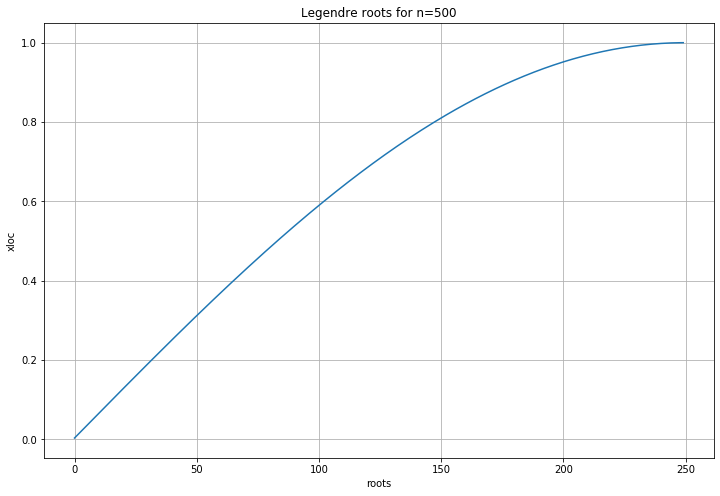

In [56]:
n = 500
rs_n, npl_n = prufer_roots(n)

plt.figure(figsize=(12,8))
plt.plot(rs_500)
plt.title("Legendre roots for n="+str(n))
plt.ylabel("xloc")
plt.xlabel("roots")
plt.grid()
plt.show()

roots found: 25


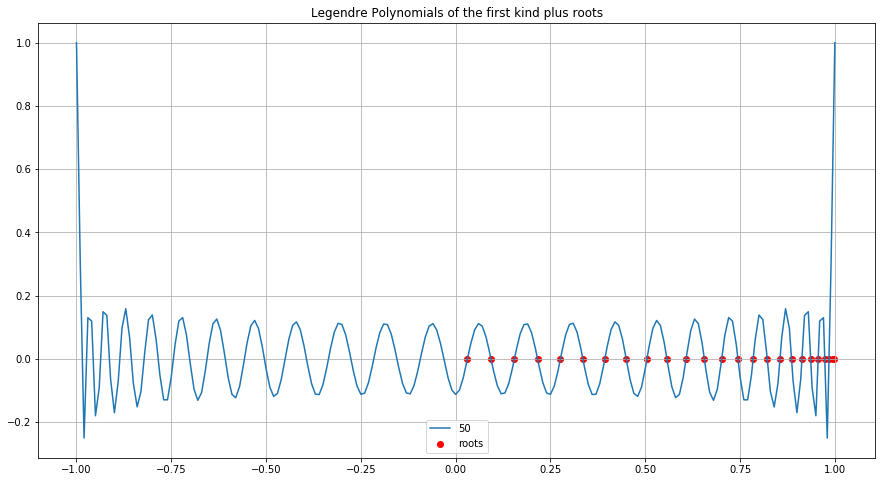

In [55]:
n = 50
rs_n, npl_n = prufer_roots(n)

# generate the legendre polynomials explicitly
x = np.arange(-1,1.01,0.01)
# the first few legendre polynomials of the first kind via a generating function
lp_1gen = []
lp_1gen.append(x*0+1)
lp_1gen.append(x)
for i in range(2,n+1):
    lp_1gen.append(((2*i-1)*x*lp_1gen[i-1] - (i-1)*lp_1gen[i-2])/i)

    
plt.figure(figsize=(15,8))
plt.title("Legendre Polynomials of the first kind plus roots")
plt.plot(x,lp_1gen[-1],label=str(i))
plt.scatter(rs_n,np.zeros(len(rs_n)),color="r",label="roots")
plt.legend()
plt.grid()
plt.show()
plt.close()